<a href="https://colab.research.google.com/github/Tirth1306/Sentiment-Analysis/blob/master/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **18bce245 - Tirth Patel**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
movie_reviews = pd.read_csv('/content/gdrive/My Drive/IMDB Dataset.csv')

In [ ]:
print(movie_reviews.loc[57])

review       I laughed all the way through this rotten movi...
sentiment                                             negative
Name: 57, dtype: object


In [ ]:
movie_reviews.isnull().values.any()


False

In [ ]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

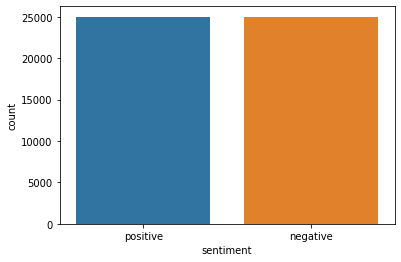

In [ ]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
%tensorflow_version 1.x
from numpy import array
import keras.backend as KB
import keras.layers as KL
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Bidirectional
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input, LSTM

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [ ]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train[1])

I did not watch the entire movie could not watch the entire movie stopped the DVD after watching for half an hour and suggest anyone thinking of watching themselves it stop themselves before taking the disc out of the case like Mafia movies both tragic and comic but Corky Romano can only be described as tragic attempt at mafia comedy The problem is Corky Romano simply tries too hard to get the audience to laugh the plot seems to be an excuse for moving Chris Kattan Corky from one scene to another Corky himself is completely overplayed and lacks subtlety or credulity all his strange mannerisms come across as contrived Chris Kattan is clearly acting rather than taking role it bounces you right out of the story Each scene is utterly predictable the comedic event that will occur on the set is obvious as soon as each scene is introduced In comedies such as Mr Bean the disasters caused by the title character are funny because you can empathise with the characters motivations and initial even

In [ ]:
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[0])

[9, 43, 786, 2121, 524, 299, 1, 104, 1860, 1989, 4281, 6409, 2, 782, 4786, 9, 1, 224, 1, 6093, 77, 763, 51, 49, 17, 97, 3, 1, 24, 1968, 98, 31, 23, 32, 116, 1101, 9, 6, 5, 2323, 1163, 4, 449, 43, 540, 4, 88, 28, 20, 37, 892, 397, 13, 1, 154, 4, 2935, 22, 4318, 18, 2897, 9, 42, 71, 218, 69, 123, 7, 76, 3100, 193, 18, 232, 2, 1, 427, 198, 4888, 147, 19, 60, 24, 13, 70, 358, 299, 16, 15, 6, 198, 25, 302, 9, 11, 1, 1820, 112, 413, 2, 11, 1, 1651, 562, 67, 419, 373, 82, 114, 43, 110, 361, 28, 33, 15, 41, 10, 88, 441, 6746, 13, 357, 1145, 59, 7, 1, 460, 214, 992, 4, 4124, 7, 174, 3, 32, 433, 680, 607, 9, 66, 227, 233, 107, 830, 33, 169, 27, 217, 9, 1, 423, 360, 53, 3696, 273, 157, 1672, 187, 5, 1, 711, 1904, 1, 1177, 3, 2838, 3672, 1652, 2, 144, 147, 225, 3, 203, 320, 2, 147, 1052, 14, 85, 3, 131, 2790, 15, 152, 95, 3, 1, 3974, 299, 8, 12, 975, 33, 1, 485, 2567, 242, 66, 72, 104, 104, 678, 57, 80, 66, 148, 1331, 4, 223, 131, 20, 4319, 29, 137, 205, 1123, 11, 4341, 5211, 29, 2276, 2, 7, 8, 5,

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/gdrive/My Drive/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
len(embeddings_dictionary)

400000

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=True)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          9254700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 9,415,701
Trainable params: 9,415,701
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)


Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 802s 25ms/step - loss: 0.6480 - acc: 0.6297 - val_loss: 0.5791 - val_acc: 0.7325
Epoch 2/10
32000/32000 [==============================] - 798s 25ms/step - loss: 0.5504 - acc: 0.7357 - val_loss: 0.4847 - val_acc: 0.7864
Epoch 3/10
32000/32000 [==============================] - 791s 25ms/step - loss: 0.4568 - acc: 0.7991 - val_loss: 0.4312 - val_acc: 0.8135
Epoch 4/10
32000/32000 [==============================] - 793s 25ms/step - loss: 0.4013 - acc: 0.8288 - val_loss: 0.3921 - val_acc: 0.8260
Epoch 5/10
32000/32000 [==============================] - 786s 25ms/step - loss: 0.3667 - acc: 0.8484 - val_loss: 0.3825 - val_acc: 0.8495
Epoch 6/10
32000/32000 [==============================] - 797s 25ms/step - loss: 0.3369 - acc: 0.8619 - val_loss: 0.3342 - val_acc: 0.8604
Epoch 7/10
32000/32000 [==============================] - 826s 26ms/step - loss: 0.3180 - acc: 0.8710 - val_loss: 0.

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3071125388383865
Test Accuracy: 0.8705999851226807


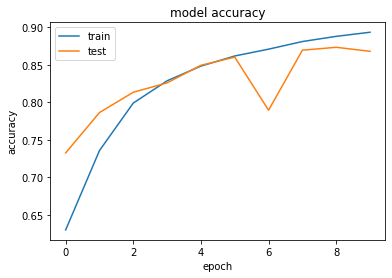

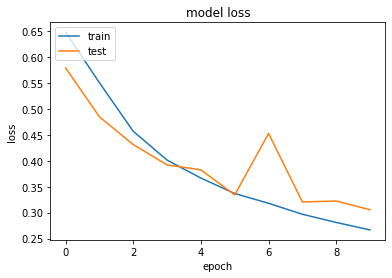

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
instance = X[4]
print(instance)

Petter Mattei Love in the Time of Money is visually stunning film to watch Mr Mattei offers us vivid portrait about human relations This is movie that seems to be telling us what money power and success do to people in the different situations we encounter This being variation on the Arthur Schnitzler play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitat The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounter The acting is good under 

In [ ]:
instance = tokenizer.texts_to_sequences(instance)
print(instance)
flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

[[4962], [1674], [2798], [2798], [1674], [4538], [], [147], [128], [2798], [2798], [1674], [124], [], [6091], [3940], [3168], [1674], [], [124], [], [], [2798], [7073], [1674], [], [2798], [124], [147], [1674], [], [3940], [6269], [], [147], [3940], [], [1674], [], [], [124], [767], [], [3168], [124], [767], [], [128], [6091], [6091], [], [], [767], [2798], [], [], [], [124], [], [2189], [], [6269], [124], [6091], [147], [], [2798], [3940], [], [4057], [128], [2798], [2965], [7073], [], [147], [4538], [], [147], [128], [2798], [2798], [1674], [124], [], [3940], [6269], [6269], [1674], [4538], [767], [], [], [767], [], [3168], [124], [3168], [124], [441], [], [4962], [3940], [4538], [2798], [4538], [128], [124], [2798], [], [128], [1957], [3940], [], [2798], [], [7073], [], [147], [128], [], [], [4538], [1674], [6091], [128], [2798], [124], [3940], [], [767], [], [2798], [7073], [124], [767], [], [124], [767], [], [147], [3940], [3168], [124], [1674], [], [2798], [7073], [128], [2798], 

array([[0.7643601]], dtype=float32)

In [ ]:
movie_reviews.loc[4]